In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [45]:
data = pd.read_csv("/content/House_Rent_Dataset.csv")
data.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [46]:
#Checking whether the dataset has any null values
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [47]:
#Checking for duplicates in dataset
duplicate_rows = data[data.duplicated()]

#Showing duplicated Rows
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 0


In [48]:
#Encoding Categorical Data
df2 = data.join(pd.get_dummies(data[['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']], drop_first=True))
df2.drop(columns = ['Posted On','Floor','Area Type','Area Locality','City','Furnishing Status','Tenant Preferred','Point of Contact'], inplace = True)

In [49]:
#Checking data types
df2.dtypes

BHK                                  int64
Rent                                 int64
Size                                 int64
Bathroom                             int64
Area Type_Carpet Area                uint8
Area Type_Super Area                 uint8
City_Chennai                         uint8
City_Delhi                           uint8
City_Hyderabad                       uint8
City_Kolkata                         uint8
City_Mumbai                          uint8
Furnishing Status_Semi-Furnished     uint8
Furnishing Status_Unfurnished        uint8
Tenant Preferred_Bachelors/Family    uint8
Tenant Preferred_Family              uint8
Point of Contact_Contact Builder     uint8
Point of Contact_Contact Owner       uint8
dtype: object

In [50]:
#Checking the first 5 records
df2.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,1,0,0,0,1,0,0,1,1,0,0,1
1,2,20000,800,1,0,1,0,0,0,1,0,1,0,1,0,0,1
2,2,17000,1000,1,0,1,0,0,0,1,0,1,0,1,0,0,1
3,2,10000,800,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,2,7500,850,1,1,0,0,0,0,1,0,0,1,0,0,0,1


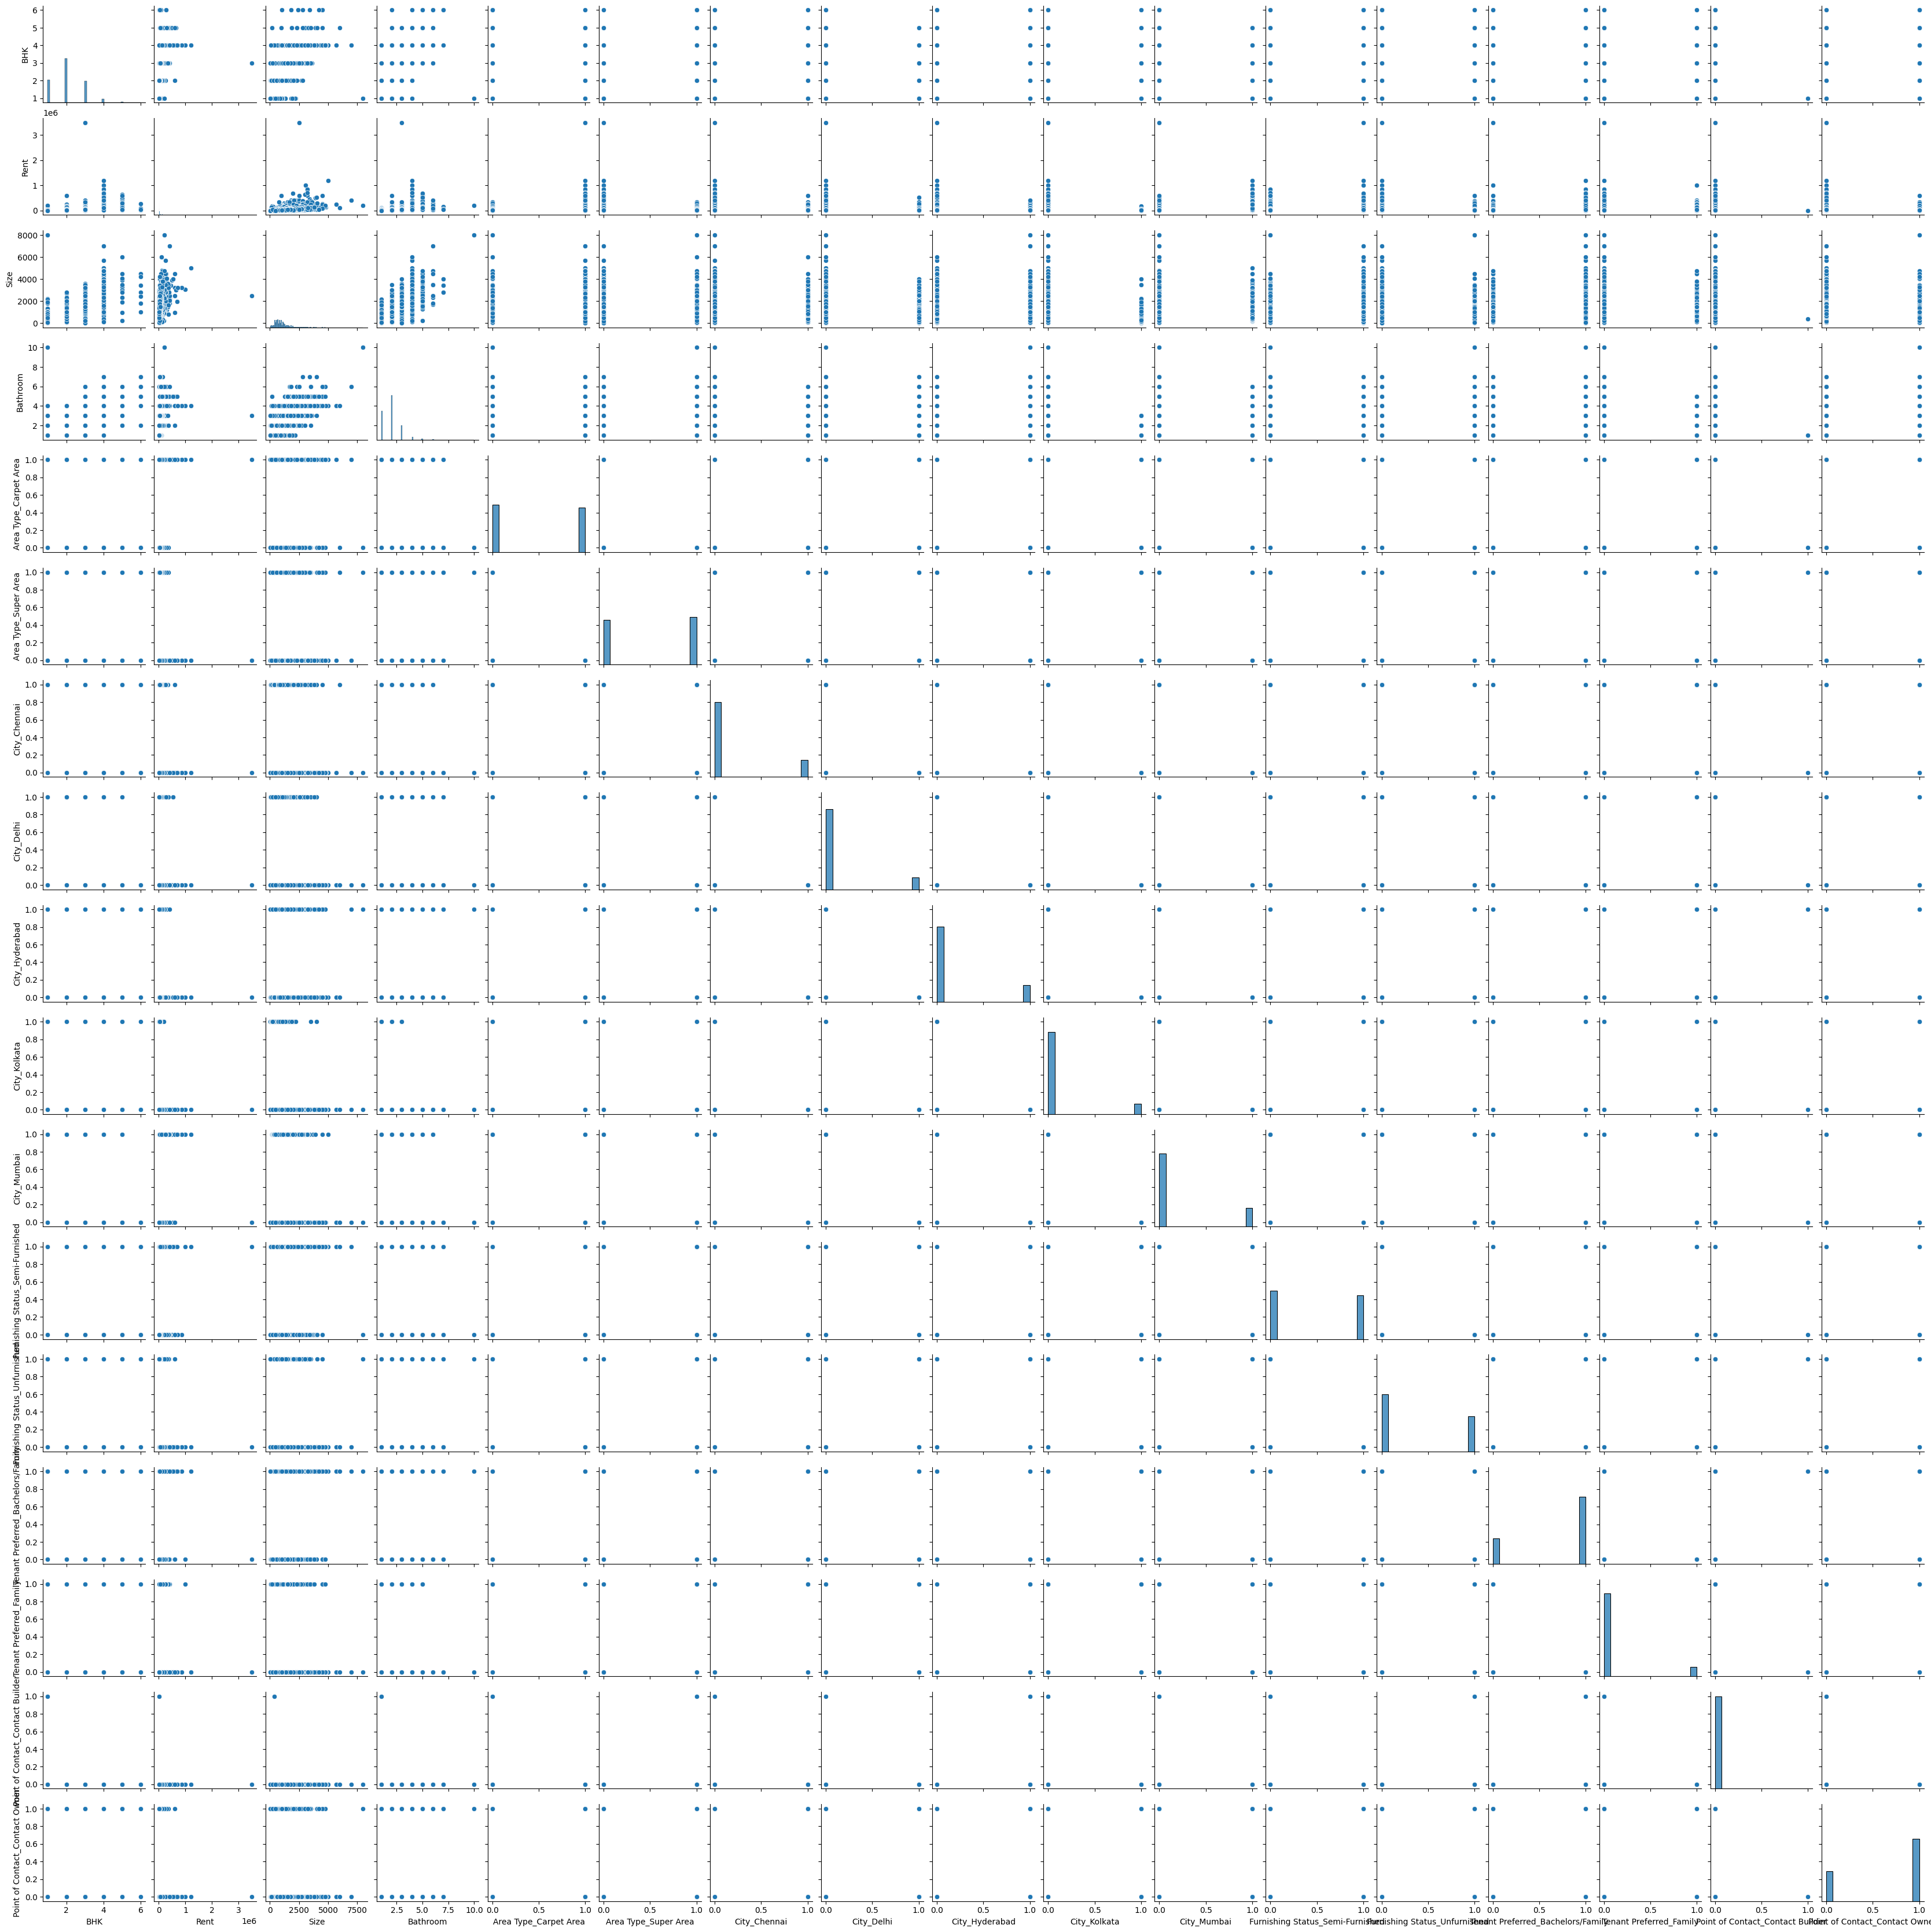

In [51]:
#Visulaizations
sns.pairplot(df2,height=2)
plt.show()

<Axes: >

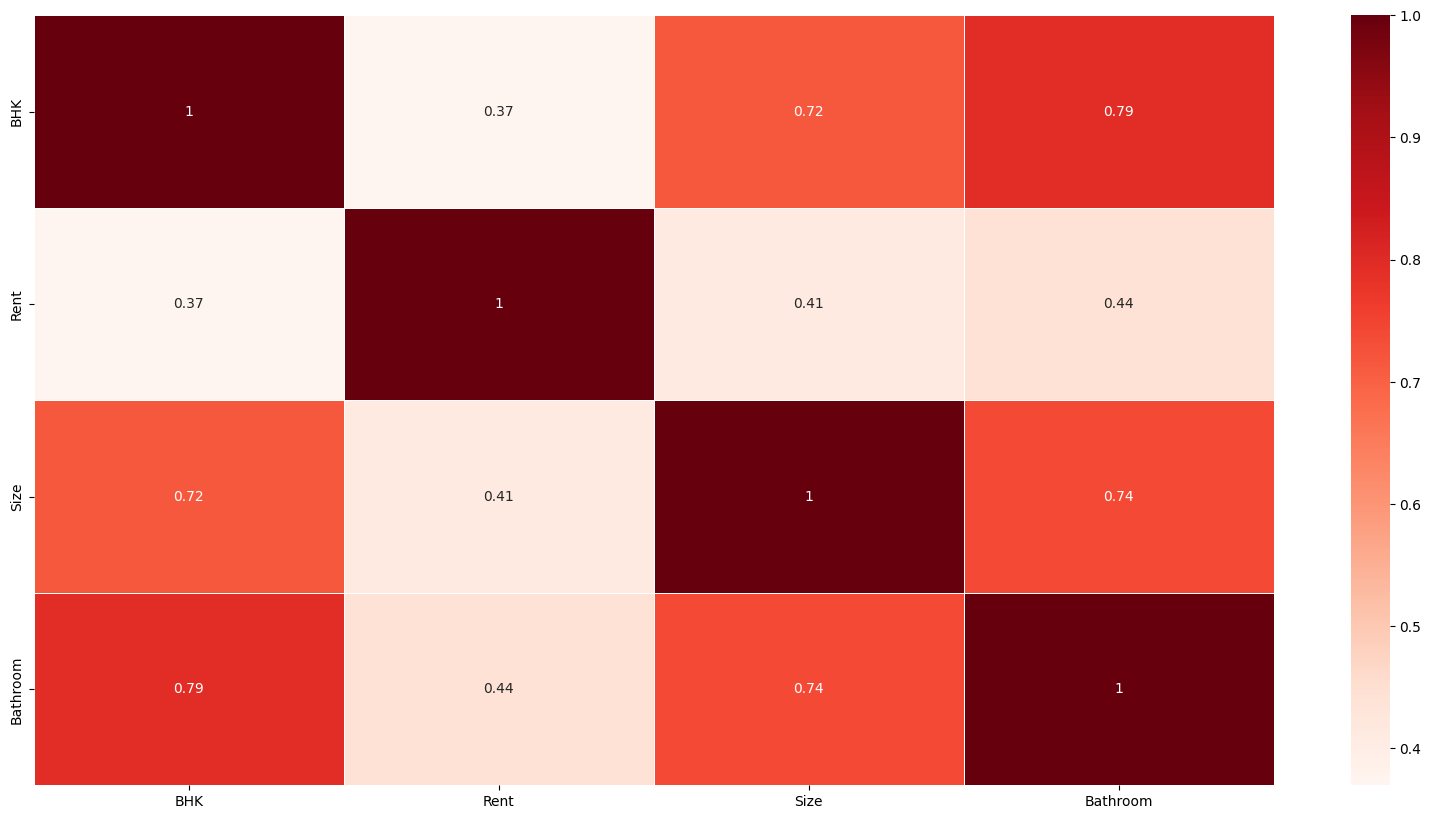

In [52]:
#Pearson Correlation Matrix Extracting Features

correlationMatrix = data.corr()

plt.figure(figsize = (20,10))
sns.heatmap(correlationMatrix, annot = True, cmap = "Reds", linewidths = 0.5)

In [53]:
#Identifying characteristics with greater correlation values than the threshold
threshold = 0.75

corrFeatures = set()# Correlation Features

for i in range(len(correlationMatrix.columns)):
    for j in range(i):
        if abs(correlationMatrix.iloc[i,j]) >= threshold: # comparing correlation value to threshold value
            corrFeatures.add(correlationMatrix.columns[i])# Adding the Features to the set

,BHK,Rent,Size,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,0,1,0,0,0,1,0,0,1,1,0,0,1
1,2,20000,800,0,1,0,0,0,1,0,1,0,1,0,0,1
2,2,17000,1000,0,1,0,0,0,1,0,1,0,1,0,0,1
3,2,10000,800,0,1,0,0,0,1,0,0,1,1,0,0,1
4,2,7500,850,1,0,0,0,0,1,0,0,1,0,0,0,1


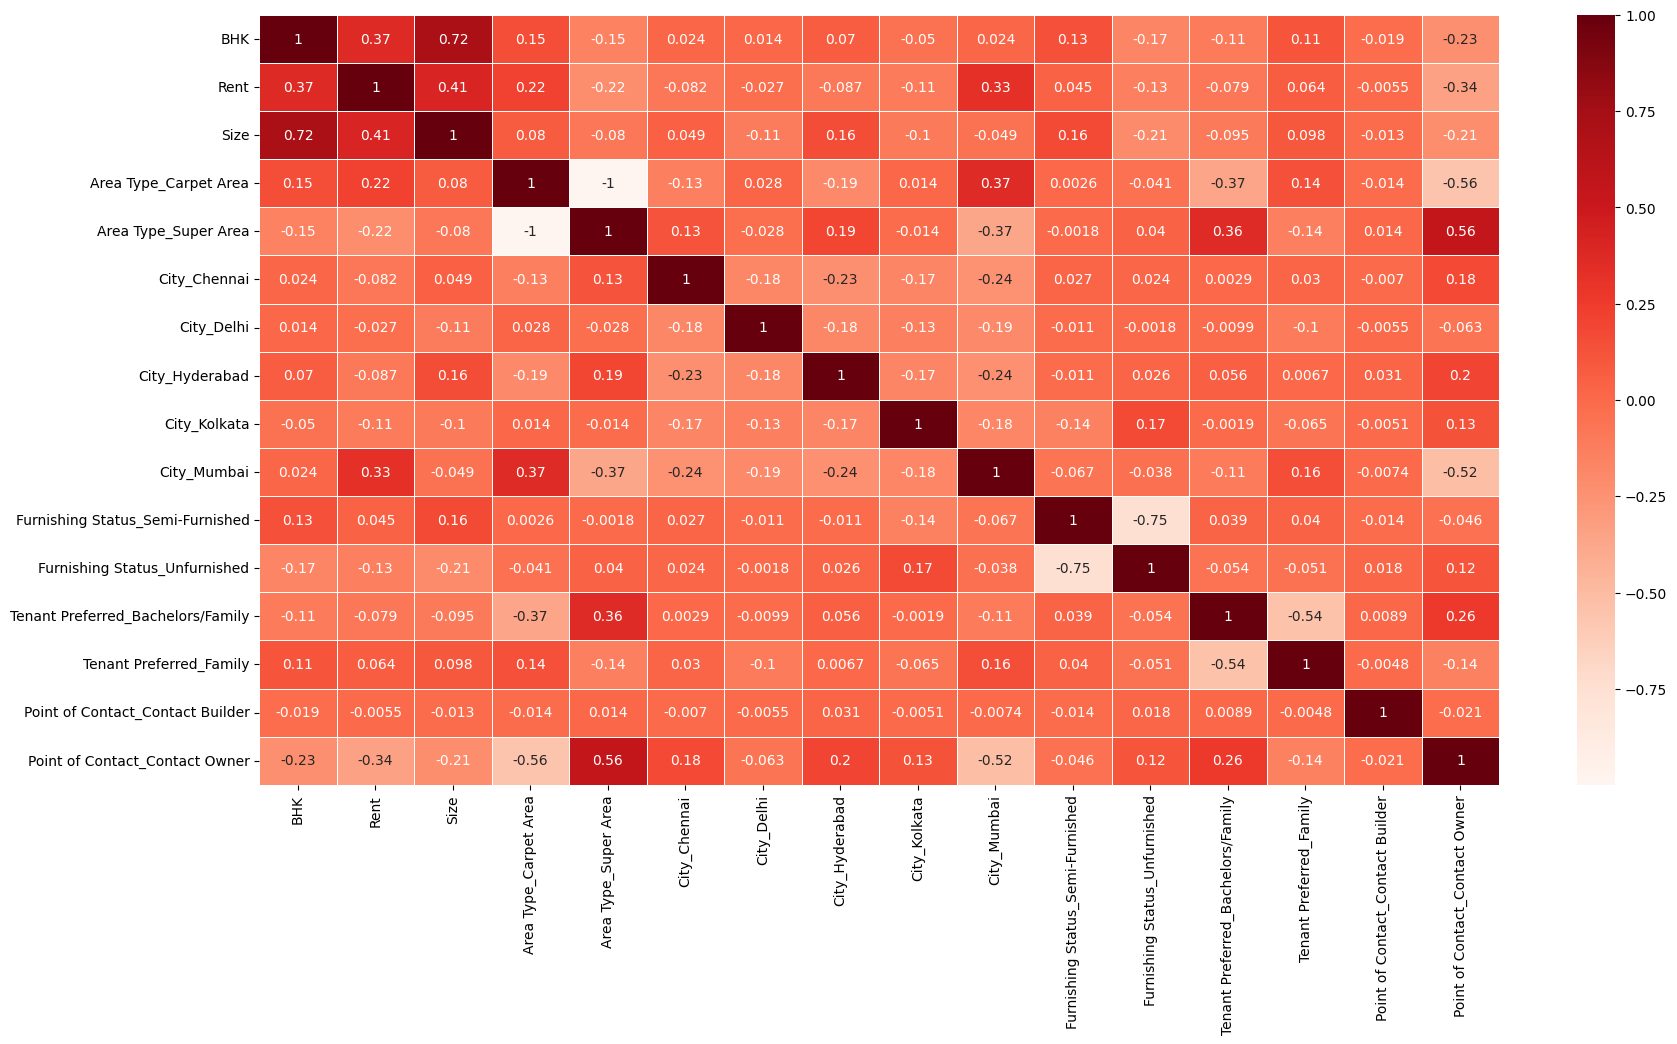

In [54]:
X_new =  df2.drop(corrFeatures, axis = 1)
correlationMatrix = X_new.corr()

plt.figure(figsize = (20,10))
sns.heatmap(correlationMatrix, annot = True, cmap = "Reds", linewidths = 0.5)
X_new.head()

In [55]:
#Creating a copy of Dataset 
dataset2=df2

#Convert Object columns to numeric
dataset2 = pd.get_dummies(dataset2)
dataset2.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,1,0,0,0,1,0,0,1,1,0,0,1
1,2,20000,800,1,0,1,0,0,0,1,0,1,0,1,0,0,1
2,2,17000,1000,1,0,1,0,0,0,1,0,1,0,1,0,0,1
3,2,10000,800,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,2,7500,850,1,1,0,0,0,0,1,0,0,1,0,0,0,1


In [56]:
#Creating of x and y variables
X = dataset2.drop('Rent', axis=1).to_numpy()
y = dataset2['Rent'].to_numpy()

In [57]:
#Dividing of training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3796, 16) (950, 16) (3796,) (950,)


# **Checking the R squared**

In [58]:
# Fitting the Linear Regression model- training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [59]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)

In [60]:
# Calculatation of the R-Squared
r2 = r2_score(y_test, y_pred)

In [61]:
print("R-Squared- ", r2)

R-Squared-  0.12806463588866146





**DecisionTreeRegressor**

In [62]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X,y)

DecisionTreeRegressor()

In [63]:
pred = dt_regressor.predict(X_test)

In [64]:
DTR_Accuracy=r2_score(y_test, pred)
print("Accuracy: " + str(DTR_Accuracy))

Accuracy: 0.9981302018663891


**LogisticRegression**

In [65]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_predicts =LR.predict(X_test)

In [67]:
LR_Predict = LR.predict(X_train)
LR_Accuracy = accuracy_score(y_train, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

Accuracy: 0.060326659641728134


**RandomForestClassifier**

In [68]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_predicts =RFC.predict(X_test)

In [70]:
RFC_Predict = RFC.predict(X_train)
RFC_Accuracy = accuracy_score(y_train, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 0.7581664910432033


In [71]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [72]:
GNB_Predict = GNB.predict(X_train)
GNB_Accuracy = accuracy_score(y_train, GNB_Predict)
print("Accuracy: " + str(GNB_Accuracy))

Accuracy: 0.052160168598524764


**Gaussian Naive Bayes (GaussianNB) Model Hyperparameter**

In [73]:
#Var_smoothing hyperparameter
param_grid = {'var_smoothing': [0.0001, 0.001, 0.01, 0.1, 1.0]}

#Creating of GNB model
GNB = GaussianNB()

#Creating a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(GNB, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Printing the best hyperparameters and finding the best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters:  {'var_smoothing': 0.01}
Best Score:  0.07692150336315096


In [74]:
y_pred = grid_search.predict(X_train)

# Calculate the accuracy of the model on the validation
accuracy = accuracy_score(y_train, y_pred)
print("Validation Accuracy: ", accuracy)


Validation Accuracy:  0.0779768177028451


In [75]:
models = ['DecisionTreeClassifier','LogisticRegression', 'RandomForestClassifier', 'GaussianNB']
accuracies = [DTR_Accuracy, LR_Accuracy, RFC_Accuracy, GNB_Accuracy ]
model_performance_acc = pd.DataFrame(list(zip(models, accuracies)), columns = ['Model', 'Accuracy'])

In [76]:
model_performance_acc.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
0,DecisionTreeClassifier,0.998130
2,RandomForestClassifier,0.758166
1,LogisticRegression,0.060327
3,GaussianNB,0.052160


In [77]:

# Define pipeline and parameters to tune
pipeline = Pipeline([
    ('clf', RandomForestClassifier(random_state=100))
])

parameters = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 5, 10]
}

# Use GridSearchCV to find best model
gs_clf = GridSearchCV(pipeline, parameters, cv=5)
gs_clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf',
                                        RandomForestClassifier(random_state=100))]),
             param_grid={'clf__max_depth': [None, 5, 10],
                         'clf__n_estimators': [50, 100, 200]})

In [78]:
#Feature importances of the model
# Use best model and test data for final evaluation
y_pred = gs_clf.predict(X_test)

# Output heading
print('\nOptimized Model')
print('\nModel Name:', str(gs_clf.best_estimator_.named_steps['clf']))
print('\n')

# Feature Importance - optimized
importances = gs_clf.best_estimator_.named_steps['clf'].feature_importances_
print('Feature Importances')
for name, score in zip(list(dataset2.columns)[:-1], importances):
    print(name, round(score, 2))


Optimized Model

Model Name: RandomForestClassifier(max_depth=5, n_estimators=200, random_state=100)


Feature Importances
BHK 0.14
Rent 0.2
Size 0.16
Bathroom 0.03
Area Type_Carpet Area 0.03
Area Type_Super Area 0.01
City_Chennai 0.02
City_Delhi 0.02
City_Hyderabad 0.04
City_Kolkata 0.12
City_Mumbai 0.02
Furnishing Status_Semi-Furnished 0.05
Furnishing Status_Unfurnished 0.02
Tenant Preferred_Bachelors/Family 0.02
Tenant Preferred_Family 0.0
Point of Contact_Contact Builder 0.12


**References**

Verdhan, V. (2019). Supervised Learning with Python. Packt Publishing.

Statistical Pred Modelling (DATA 2204). DC Connect.

Capstone (DATA 2206). DC Connect.





